In [1]:
import os 
import yaml 
import pickle
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


plt.rcParams['font.size'] = 14 
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['lines.linewidth'] = .5

In [2]:
from bindata_processing.base import bindata_query 
from bindata_processing import plots 

In [3]:
# load and process bindata dictionary 
with open('user_input.yaml', 'r') as f:
    inputs = yaml.safe_load(f)

query = bindata_query( inputs )
query.load_dict()

In [4]:
# visualization of the dictionary hiarchy 
print( query )

NSEFNO_BANKNIFTY
|	H25
|	|	17-03-2025
|	|	|	Spot
|	|	|	Strike
|	|	|	|	47900.0
|	|	|	|	48000.0
|	|	|	|	48100.0
|	|	|	|	48200.0
|	|	|	|	48300.0
|	|	|	|	48400.0
|	|	|	|	48500.0
|	|	|	|	48600.0
|	|	|	|	48700.0
|	|	|	|	48800.0
|	|	|	Stamp
|	|	18-03-2025
|	|	|	Spot
|	|	|	Strike
|	|	|	|	48300.0
|	|	|	|	48400.0
|	|	|	|	48500.0
|	|	|	|	48600.0
|	|	|	|	48700.0
|	|	|	|	48800.0
|	|	|	|	48900.0
|	|	|	|	49000.0
|	|	|	|	49100.0
|	|	|	|	49200.0
|	|	|	Stamp
|	J25
|	|	17-03-2025
|	|	|	Spot
|	|	|	Strike
|	|	|	|	48200.0
|	|	|	|	48300.0
|	|	|	|	48400.0
|	|	|	|	48500.0
|	|	|	|	48600.0
|	|	|	|	48700.0
|	|	|	|	48800.0
|	|	|	|	48900.0
|	|	|	|	49000.0
|	|	|	|	49100.0
|	|	|	Stamp
|	|	18-03-2025
|	|	|	Spot
|	|	|	Strike
|	|	|	|	48600.0
|	|	|	|	48700.0
|	|	|	|	48800.0
|	|	|	|	48900.0
|	|	|	|	49000.0
|	|	|	|	49100.0
|	|	|	|	49200.0
|	|	|	|	49300.0
|	|	|	|	49400.0
|	|	|	|	49500.0
|	|	|	Stamp
NSEFNO_FINNIFTY
|	H25
|	|	17-03-2025
|	|	|	Spot
|	|	|	Strike
|	|	|	|	23100.0
|	|	|	|	23150.0
|	|	|	|	23200.0
|	|	|	|	23250.0
|	

In [5]:
# sport for an underlying on a given date 
query.main_dict['NSEFNO_BANKNIFTY']['H25']['17-03-2025']['Spot']

,Symbol,Close,Spot Return %
2025-03-17 09:15:01,NSEFNO_BANKNIFTY_H25,48310.17,NaN
2025-03-17 09:15:02,NSEFNO_BANKNIFTY_H25,48315.39,0.010805
2025-03-17 09:15:03,NSEFNO_BANKNIFTY_H25,48297.48,-0.037069
2025-03-17 09:15:04,NSEFNO_BANKNIFTY_H25,48265.45,-0.066318
2025-03-17 09:15:05,NSEFNO_BANKNIFTY_H25,48255.31,-0.021009
...,...,...,...
2025-03-17 15:29:56,NSEFNO_BANKNIFTY_H25,48497.15,0.002743
2025-03-17 15:29:57,NSEFNO_BANKNIFTY_H25,48496.74,-0.000845
2025-03-17 15:29:58,NSEFNO_BANKNIFTY_H25,48497.34,0.001237
2025-03-17 15:29:59,NSEFNO_BANKNIFTY_H25,48497.38,0.000082


In [6]:
# orb2 (C - P - S + K) data for a given underlying on a given date for a given strike (K)
query.main_dict['NSEFNO_FINNIFTY']['H25']['18-03-2025']['Strike'][23550.0]

,PE_Close,CE_Close,Orb2,Orb2_diff
2025-03-18 09:15:01,158.50,297.50,-99.25,NaN
2025-03-18 09:15:02,158.50,292.50,40.58,139.83
2025-03-18 09:15:03,159.50,287.50,35.78,-4.80
2025-03-18 09:15:04,159.50,285.00,33.33,-2.45
2025-03-18 09:15:05,159.55,285.00,31.88,-1.45
...,...,...,...,...
2025-03-18 15:29:56,64.03,541.95,-6.71,-12.74
2025-03-18 15:29:57,63.78,539.05,-11.03,-4.32
2025-03-18 15:29:58,63.63,540.55,-9.41,1.62
2025-03-18 15:29:59,63.70,542.96,-6.99,2.42


In [ ]:
# prints all time series for orb2 value ( USE : 'orb2' ) or all time series for orb2 first difference for all underlying for all exps for all dates and for all strikes 
plots.plot_all_orb2( query , 'Orb2_diff' )

In [8]:
date = query.dates_formated[0][0]
st1_df = query.main_dict['NSEFNO_BANKNIFTY']['H25'][date]['Strike'][48300.0]
st2_df = query.main_dict['NSEFNO_BANKNIFTY']['H25'][date]['Strike'][48800.0]

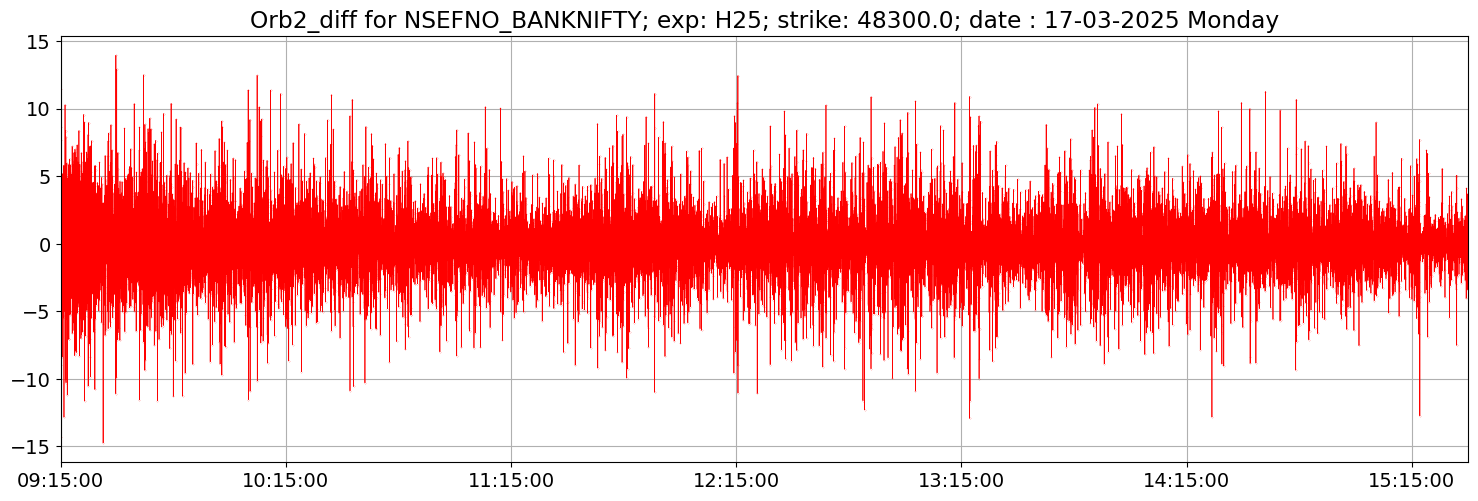

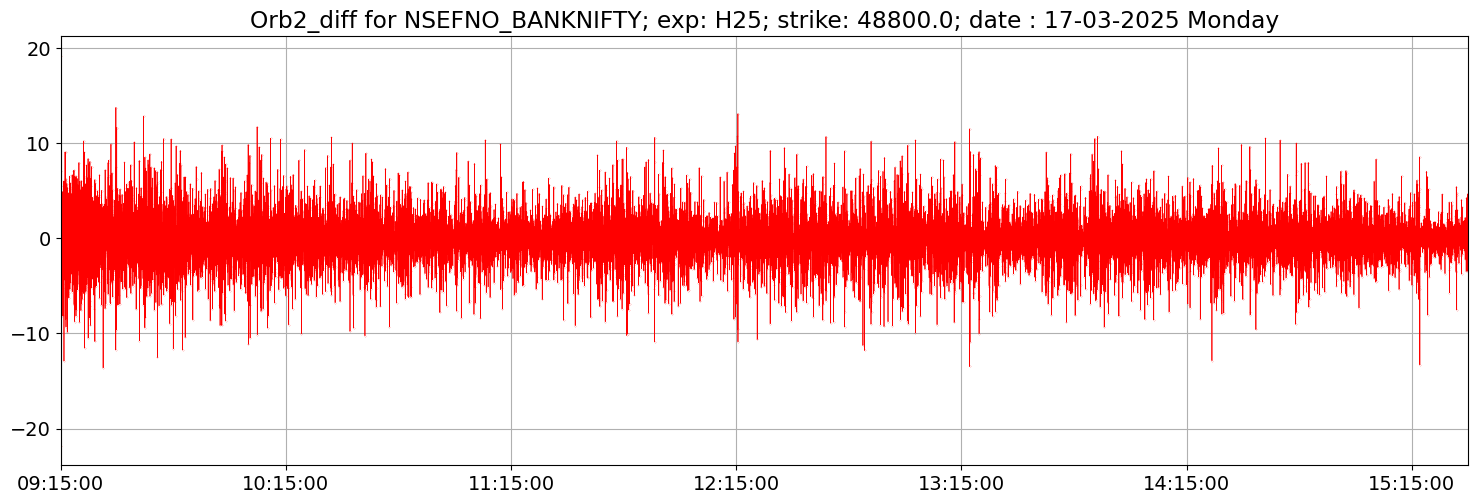

In [9]:
plots.plot_time_series( st1_df , 'Orb2_diff' , 48300.0 , query.main_dict['NSEFNO_BANKNIFTY']['H25'][date]['Stamp'] , date , 'NSEFNO_BANKNIFTY'  , 'H25'  ) 
plots.plot_time_series( st2_df , 'Orb2_diff' , 48800.0 , query.main_dict['NSEFNO_BANKNIFTY']['H25'][date]['Stamp'] , date ,  'NSEFNO_BANKNIFTY' , 'H25') 

In [10]:
strikes_df = { 48300.0 : st1_df , 48800.0 : st2_df }

### KPSS Test 

In [11]:
from statsmodels.tsa.stattools import kpss

for strike , df in strikes_df.items() : 
    temp = {}

    stat1, p_value1, lags1, crit1 = kpss(df['Orb2_diff'][1:], regression='c') 

    temp['stat1'] = stat1 
    temp['p_value1']  = p_value1 
    temp['crit1'] = crit1

    

    print(f'KPSS Results of Rejection: strike = {strike}')
    for k , v in temp.items() : 
        print( f'{k}: {v}' )
    print({ k : stat1 > v for k, v in temp['crit1'].items() } )
    print('-'*20)

KPSS Results of Rejection: strike = 48300.0
stat1: 0.011615409842628712
p_value1: 0.1
crit1: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
{'10%': np.False_, '5%': np.False_, '2.5%': np.False_, '1%': np.False_}
--------------------
KPSS Results of Rejection: strike = 48800.0
stat1: 0.055999600187959166
p_value1: 0.1
crit1: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
{'10%': np.False_, '5%': np.False_, '2.5%': np.False_, '1%': np.False_}
--------------------


/tmp/ipykernel_9292/659188271.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat1, p_value1, lags1, crit1 = kpss(df['Orb2_diff'][1:], regression='c')
/tmp/ipykernel_9292/659188271.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat1, p_value1, lags1, crit1 = kpss(df['Orb2_diff'][1:], regression='c')


### ADF Test

In [12]:
from statsmodels.tsa.stattools import adfuller

for strike , df in strikes_df.items() : 
    temp = {}

    stat1, p_value1, lags1, _ ,  crit1  , _ = adfuller(df['Orb2_diff'][1:]  ) 

    temp['stat1'] = stat1 
    temp['p_value1']  = p_value1 
    temp['crit1'] = crit1



    print(f'ADF Results of Rejection: strike: {strike}' )
    for k , v in temp.items() : 
        print( f'{k}: {v}' )
    print( f'p-value < 0.05: {p_value1 < 0.05 }' )
    print( { k : stat1 < v for k, v in temp['crit1'].items() } )
    print('-'*20)

ADF Results of Rejection: strike: 48300.0
stat1: -32.723226246038834
p_value1: 0.0
crit1: {'1%': np.float64(-3.4306412123785357), '5%': np.float64(-2.861668706412374), '10%': np.float64(-2.566838506771659)}
p-value < 0.05: True
{'1%': np.True_, '5%': np.True_, '10%': np.True_}
--------------------
ADF Results of Rejection: strike: 48800.0
stat1: -32.7343346516755
p_value1: 0.0
crit1: {'1%': np.float64(-3.4306412123785357), '5%': np.float64(-2.861668706412374), '10%': np.float64(-2.566838506771659)}
p-value < 0.05: True
{'1%': np.True_, '5%': np.True_, '10%': np.True_}
--------------------


### Fit Arima Model using AIC and BIC 

In [13]:
from statsmodels.tsa.arima.model import ARIMA


def grid_search_ARIMA( data , max_p = 3  , max_q = 3 , method = 'AIC') : 

    best = np.inf
    best_order = None

    for p in range(1,max_p + 1):
        for q in range(1,max_q + 1):

            try:
                model = ARIMA(data, order=(p, 0, q))  # d=0 means no differencing here
                result = model.fit()
                if method == 'AIC' : 
                    if result.aic < best:
                        best = result.aic
                        best_order = (p, q)
                if method == 'BIC' : 
                    if result.bic < best:
                        best = result.bic
                        best_order = (p, q)
            except Exception as e:
                # Sometimes model won't converge or fail; skip those
                continue

    return best_order , best 

In [14]:
for strike , df in strikes_df.items() : 
    aic_order , aic_val = grid_search_ARIMA(df['Orb2_diff'][1:])
    bic_order , bic_val = grid_search_ARIMA(df['Orb2_diff'][1:] , method = 'BIC' )

    temp = {
        'aic_order' : aic_order , 'aic_val' : aic_val , 
        'bic_order' : bic_order , 'bic_val' : bic_val 
    }

    print(f'Strike = {strike}')
    for k , v in temp.items() : 
        print( k , v )
    print('-'*20)

/home/ashmit/miniconda3/envs/Algoquant/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/ashmit/miniconda3/envs/Algoquant/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/ashmit/miniconda3/envs/Algoquant/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ashmit/miniconda3/envs/Algoquant/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters

Strike = 48300.0
aic_order (2, 3)
aic_val 96705.35941348507
bic_order (1, 3)
bic_val 96755.21454649424
--------------------


/home/ashmit/miniconda3/envs/Algoquant/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ashmit/miniconda3/envs/Algoquant/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/ashmit/miniconda3/envs/Algoquant/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/ashmit/miniconda3/envs/Algoquant/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum L

Strike = 48800.0
aic_order (2, 2)
aic_val 97222.09366933748
bic_order (2, 2)
bic_val 97270.22102619405
--------------------


### Hurst Exponent 

In [15]:
from hurst import compute_Hc 

for strike , df in strikes_df.items() : 
    H , *_  =  compute_Hc(df['Orb2_diff'][1:])
    print(f'Hurst Exponent for {strike} = {H}')

Hurst Exponent for 48300.0 = 0.15842923810582096
Hurst Exponent for 48800.0 = 0.197890291065607


### FOR Strike = 48800.0

                               SARIMAX Results                                
Dep. Variable:              Orb2_diff   No. Observations:                22500
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -48605.047
Date:                Thu, 17 Jul 2025   AIC                          97222.094
Time:                        10:57:19   BIC                          97270.221
Sample:                    03-17-2025   HQIC                         97237.750
                         - 03-17-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.002      0.310      0.756      -0.003       0.004
ar.L1          1.1545      0.024     48.934      0.000       1.108       1.201
ar.L2         -0.2276      0.018    -12.453      0.0

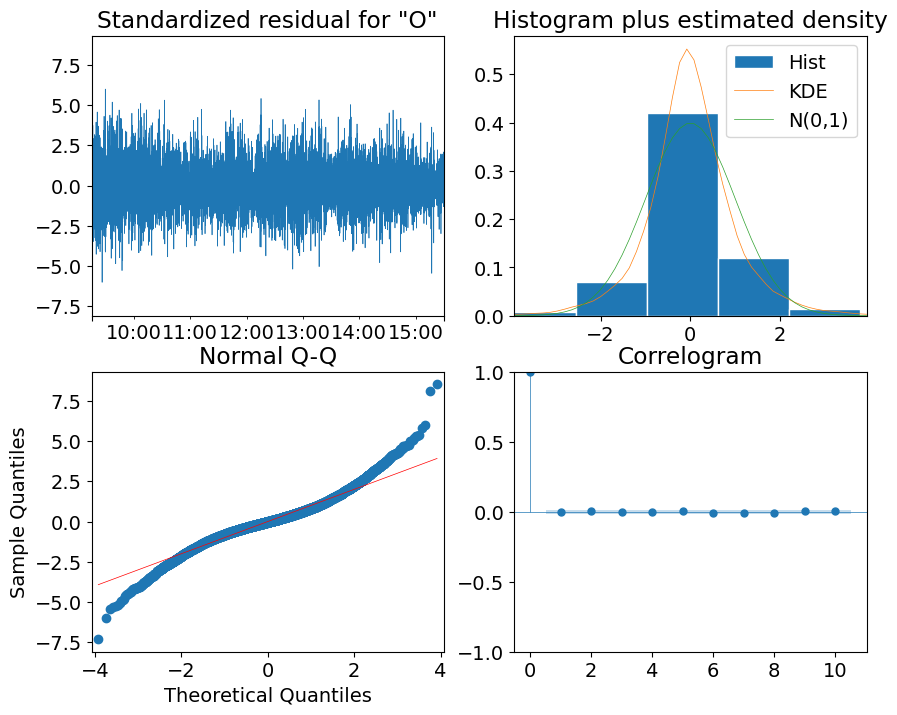

In [16]:
model = ARIMA( st2_df['Orb2_diff'] , order = ( 2 , 0 , 2 ) )
fit2 = model.fit()
print( fit2.summary() )

fit2.plot_diagnostics(figsize=(10,8))
plt.show()

/home/ashmit/miniconda3/envs/Algoquant/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              Orb2_diff   No. Observations:                22500
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -48688.467
Date:                Thu, 17 Jul 2025   AIC                          97386.933
Time:                        10:57:43   BIC                          97427.039
Sample:                    03-17-2025   HQIC                         97399.980
                         - 03-17-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5730      0.007     82.633      0.000       0.559       0.587
ar.L2          0.1250      0.006     21.191      0.000       0.113       0.137
ma.L1         -1.9303      0.004   -479.379      0.0

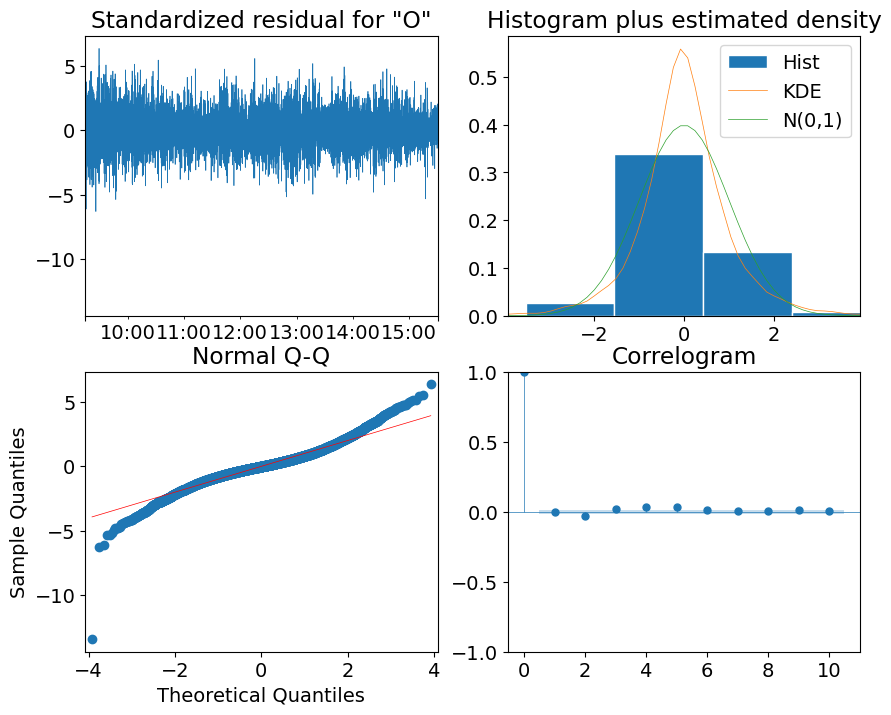

In [17]:
model = ARIMA( st2_df['Orb2_diff'] , order = ( 2 , 1 , 2 ) )
fit2 = model.fit()
print( fit2.summary() )

fit2.plot_diagnostics(figsize=(10,8))
plt.show()

### FOR Strike = 48300.0 

/home/ashmit/miniconda3/envs/Algoquant/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/ashmit/miniconda3/envs/Algoquant/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/ashmit/miniconda3/envs/Algoquant/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              Orb2_diff   No. Observations:                22500
Model:                 ARIMA(2, 0, 3)   Log Likelihood              -48345.625
Date:                Thu, 17 Jul 2025   AIC                          96705.249
Time:                        10:58:43   BIC                          96761.398
Sample:                    03-17-2025   HQIC                         96723.515
                         - 03-17-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.175e-05      0.002      0.020      0.984      -0.004       0.004
ar.L1          1.1206      0.101     11.128      0.000       0.923       1.318
ar.L2         -0.2067      0.086     -2.408      0.0

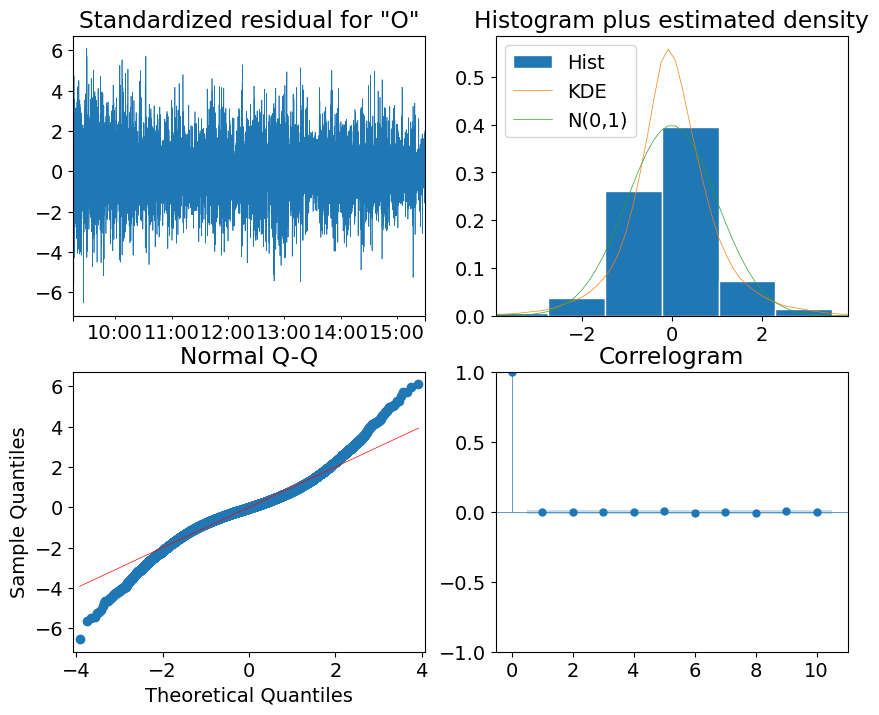

In [18]:
model = ARIMA( st1_df['Orb2_diff'] , order = ( 2 , 0 , 3 ) )
fit1 = model.fit()
print( fit1.summary() )

fit1.plot_diagnostics(figsize=(10,8))
plt.show()

/home/ashmit/miniconda3/envs/Algoquant/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              Orb2_diff   No. Observations:                22500
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -48534.067
Date:                Thu, 17 Jul 2025   AIC                          97080.135
Time:                        10:59:04   BIC                          97128.262
Sample:                    03-17-2025   HQIC                         97095.791
                         - 03-17-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4966      0.010    -50.164      0.000      -0.516      -0.477
ar.L2          0.5026      0.009     56.748      0.000       0.485       0.520
ma.L1         -0.8262      0.008    -99.919      0.0

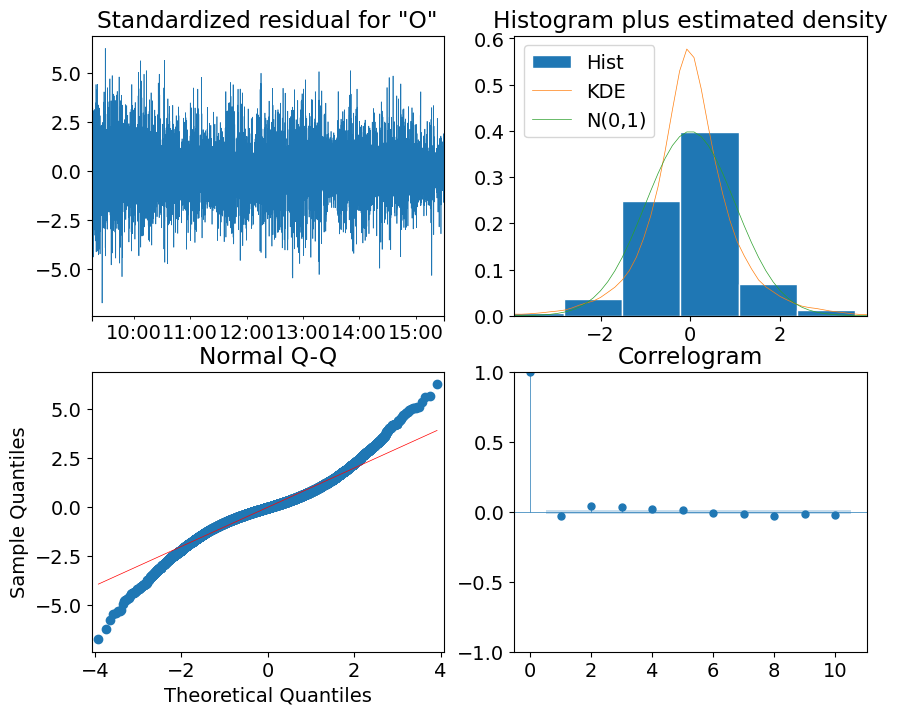

In [19]:
model = ARIMA( st1_df['Orb2_diff'] , order = ( 2 , 1 , 3 ) )
fit1 = model.fit()
print( fit1.summary() )

fit1.plot_diagnostics(figsize=(10,8))
plt.show()

                               SARIMAX Results                                
Dep. Variable:              Orb2_diff   No. Observations:                22500
Model:                 ARIMA(1, 0, 3)   Log Likelihood              -48347.544
Date:                Thu, 17 Jul 2025   AIC                          96707.087
Time:                        10:59:32   BIC                          96755.215
Sample:                    03-17-2025   HQIC                         96722.744
                         - 03-17-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.002      0.225      0.822      -0.004       0.005
ar.L1          0.8803      0.007    129.734      0.000       0.867       0.894
ma.L1         -1.2483      0.009   -146.561      0.0

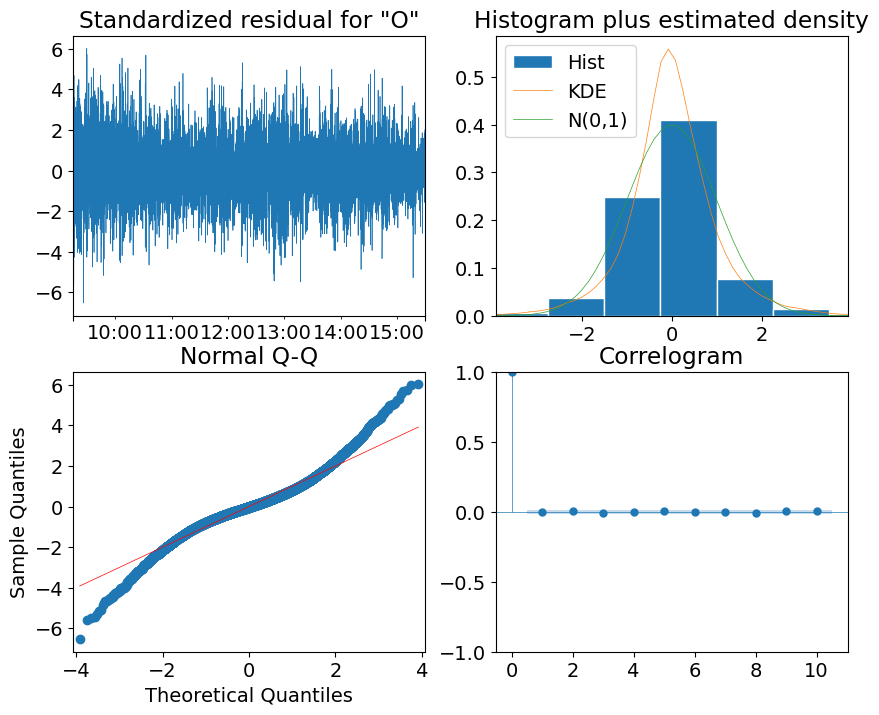

In [20]:
model = ARIMA( st1_df['Orb2_diff'] , order = ( 1 , 0 , 3 ) )
fit1 = model.fit()
print( fit1.summary() )

fit1.plot_diagnostics(figsize=(10,8))
plt.show()